Understanding context modifiers: **biphasic_stimulus_CM**
=========================================================

This small example shows a way to use the built-in [context modifiers](../../usersguide/optimization.rst#context-modifier)
:`biphasic_stimulus_CM`.

Text(0, 0.5, 'amplitude (µA)')

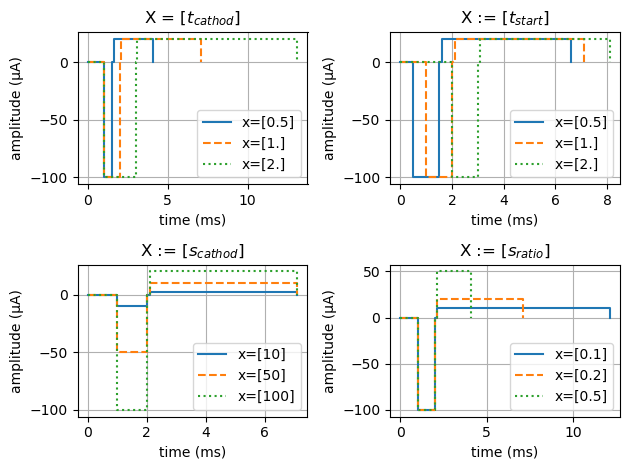

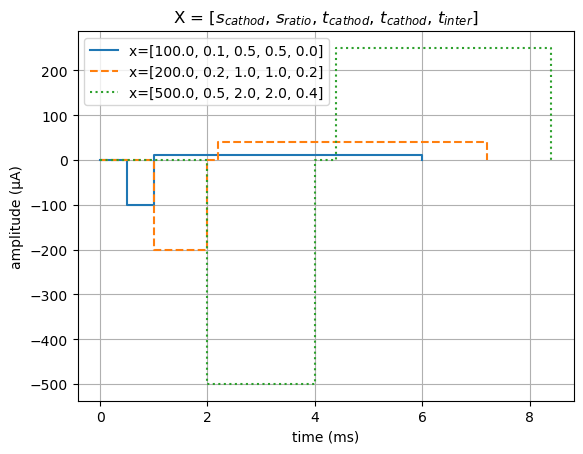

In [13]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import nrv

# Generate a dummy static context
t_sim=10
l_ax = 10000
ax = nrv.myelinated(y=0, z=0, L=l_ax)
E1 = nrv.point_source_electrode(x=l_ax/2,y=0, z=100)
dummy_stim = nrv.stimulus()

extra_stim = nrv.stimulation("epineurium")
extra_stim.add_electrode(E1, dummy_stim)
ax.attach_extracellular_stimulation(extra_stim)
static_context = ax.save(extracel_context=True)

linestyles = ["-", "--", ":"]


# set t_cathod as a variable
test_stim_CM = nrv.biphasic_stimulus_CM(start=1, t_cathod="0", s_cathod=100, s_ratio=0.2, t_inter=0.1)


# For each of this points we are going to generate the axon
# from static context with the context modifier
# and then plot the stimulus

X = np.array([
    [.5],
    [1],
    [2],
])

fig1, axs1 = plt.subplots(2,2)
axs1[0,0].set_title("X = [$t_{cathod}$]")
for i, x in enumerate(X):
    ax = test_stim_CM(x, static_context)
    stim = ax.extra_stim.stimuli[0]
    del ax
    stim.plot(axs1[0,0], linestyle=linestyles[i], label=f"x={x}")

axs1[0,0].grid()
axs1[0,0].legend()
axs1[0,0].set_xlabel('time (ms)')
axs1[0,0].set_ylabel('amplitude (µA)')


# t_strat
test_stim_CM.set_parameters(start="0", t_cathod=1, s_cathod=100, s_ratio=0.2, t_inter=0.1)

X = np.array([
    [.5],
    [1],
    [2],
])


axs1[0, 1].set_title("X := [$t_{start}$]")
for i, x in enumerate(X):
    ax = test_stim_CM(x, static_context)
    stim = ax.extra_stim.stimuli[0]
    del ax
    plt.figure(1)
    stim.plot(axs1[0, 1], linestyle=linestyles[i], label=f"x={x}")

axs1[0, 1].grid()
axs1[0, 1].legend()
axs1[0, 1].set_xlabel('time (ms)')
axs1[0, 1].set_ylabel('amplitude (µA)')


# s_cathod
test_stim_CM.set_parameters(start=1, t_cathod=1, s_cathod="0", s_ratio=0.2, t_inter=0.1)

X = np.array([
    [10],
    [50],
    [100],
])

axs1[1, 0].set_title("X := [$s_{cathod}$]")
for i, x in enumerate(X):
    # we get the stimulus of the axon generated from the context modifier
    ax = test_stim_CM(x, static_context)
    stim = ax.extra_stim.stimuli[0]
    del ax
    stim.plot(axs1[1, 0], linestyle=linestyles[i], label=f"x={x}")

axs1[1, 0].grid()
axs1[1, 0].legend()
axs1[1, 0].set_xlabel('time (ms)')
axs1[1, 0].set_ylabel('amplitude (µA)')

# s_cathod
test_stim_CM.set_parameters(start=1, t_cathod=1, s_cathod=100, s_ratio="0", t_inter=0.1)

X = np.array([
    [.1],
    [.2],
    [.5],
])


axs1[1, 1].set_title("X := [$s_{ratio}$]")
for i, x in enumerate(X):
    # we get the stimulus of the axon generated from the context modifier
    ax = test_stim_CM(x, static_context)
    stim = ax.extra_stim.stimuli[0]
    del ax
    stim.plot(axs1[1, 1], linestyle=linestyles[i], label=f"x={x}")

axs1[1, 1].grid()
axs1[1, 1].legend()
axs1[1, 1].set_xlabel('time (ms)')
axs1[1, 1].set_ylabel('amplitude (µA)')
fig1.tight_layout()

# 
test_stim_CM.set_parameters(start="3", t_cathod="2", s_cathod="0", s_ratio="1", t_inter="4")

X = np.array([
    [100, .1, .5, 0.5, 0.],
    [200, .2, 1, 1, 0.2],
    [500, .5, 2, 2, 0.4],
])

fig2, ax2 = plt.subplots()
ax2.set_title("X = [$s_{cathod}$, $s_{ratio}$, $t_{cathod}$, $t_{cathod}$, $t_{inter}$]")
for i, x in enumerate(X):
    # we get the stimulus of the axon generated from the context modifier
    ax = test_stim_CM(x, static_context)
    stim = ax.extra_stim.stimuli[0]
    del ax

    stim.plot(ax2, linestyle=linestyles[i], label=f"x={list(x)}")
    # ax1.plot(t_shift+x[::2], x[1::2], 'ok')

ax2.grid()
ax2.legend()
ax2.set_xlabel('time (ms)')
ax2.set_ylabel('amplitude (µA)')